In [1]:
import sys
from aqua import Reader
from aqua.util import get_config_dir, get_machine

sys.path.insert(0, '../')
from plots import hovmoller_plot
from tools import load_namelist, area_selection

In [6]:
configdir = get_config_dir()
machine = get_machine(configdir=configdir)

diagnostic = 'teleconnections'
telecname = 'MJO'

model = 'ICON'
exp = 'ngc3028'
source = 'P1D'

namelist = load_namelist()

field = namelist[telecname]['field']

In [7]:
reader = Reader(model=model,exp=exp,source=source,areas=False,zoom=7,regrid='r025')

In [8]:
data = reader.retrieve()
data

<xarray.Dataset>
Dimensions:                              (time: 2010, depth_half: 129,
                                          cell: 196608, level_full: 90, crs: 1,
                                          depth_full: 128,
                                          soil_depth_water_level: 5,
                                          level_half: 91,
                                          soil_depth_energy_level: 5)
Coordinates:
  * crs                                  (crs) float32 nan
  * depth_full                           (depth_full) float32 1.0 ... 5.904e+03
  * depth_half                           (depth_half) float32 0.0 ... 6.003e+03
  * level_full                           (level_full) int32 1 2 3 4 ... 88 89 90
  * level_half                           (level_half) int32 1 2 3 4 ... 89 90 91
  * soil_depth_energy_level              (soil_depth_energy_level) float32 0....
  * soil_depth_water_level               (soil_depth_water_level) float32 0.0...
  * time                                 (time) datetime64[ns] 2020-01-21 ......
    zg                                   (level_full, cell) float32 dask.array<chunksize=(90, 196608), meta=np.ndarray>
    zghalf                               (level_half, cell) float32 dask.array<chunksize=(91, 196608), meta=np.ndarray>
Dimensions without coordinates: cell
Data variables: (12/91)
    a_tracer_v_to                        (time, depth_half, cell) float32 dask.array<chunksize=(1, 33, 196608), meta=np.ndarray>
    atmos_fluxes_frshflux_evaporation    (time, cell) float32 dask.array<chunksize=(1, 196608), meta=np.ndarray>
    atmos_fluxes_frshflux_precipitation  (time, cell) float32 dask.array<chunksize=(1, 196608), meta=np.ndarray>
    atmos_fluxes_frshflux_runoff         (time, cell) float32 dask.array<chunksize=(1, 196608), meta=np.ndarray>
    atmos_fluxes_frshflux_snowfall       (time, cell) float32 dask.array<chunksize=(1, 196608), meta=np.ndarray>
    atmos_fluxes_heatflux_latent         (time, cell) float32 dask.array<chunksize=(1, 196608), meta=np.ndarray>
    ...                                   ...
    wind_speed_10m                       (time, cell) float32 dask.array<chunksize=(1, 196608), meta=np.ndarray>
    zos                                  (time, cell) float32 dask.array<chunksize=(1, 196608), meta=np.ndarray>
    msntrf                               (time, cell) float32 dask.array<chunksize=(1, 196608), meta=np.ndarray>
    mtntrf                               (time, cell) float32 dask.array<chunksize=(1, 196608), meta=np.ndarray>
    msnsrf                               (time, cell) float32 dask.array<chunksize=(1, 196608), meta=np.ndarray>
    mtnsrf                               (time, cell) float32 dask.array<chunksize=(1, 196608), meta=np.ndarray>
Attributes:
    history:  2023-06-08 12:13:30 retrieved by AQUA retriever;\n

In [9]:
# Preparing data
year = [2021,2022]
sec_month = 2.628e6 # seconds per month
sec_day = 8.64e4
latN = namelist[telecname]['latN']
latS = namelist[telecname]['latS']
lonW = namelist[telecname]['lonW']
lonE = namelist[telecname]['lonE']

infile = data[field]
infile = infile.sel(time=slice(str(year[0]),str(year[0])))
infile = reader.regrid(infile)
infile = area_selection(infile,lat=[latS,latN],lon=[lonW,lonE])
#infile = infile/sec_month
infile

<xarray.DataArray 'mtntrf' (time: 365, lat: 80, lon: 681)>
dask.array<getitem, shape=(365, 80, 681), dtype=float64, chunksize=(1, 80, 681), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2021-01-01 2021-01-02 ... 2021-12-31
  * lat      (lat) float64 -9.875 -9.625 -9.375 -9.125 ... 9.375 9.625 9.875
  * lon      (lon) float64 30.0 30.25 30.5 30.75 ... 199.2 199.5 199.8 200.0
Attributes: (12/13)
    cell_methods:   time: mean cell: mean
    component:      atmo
    grid_mapping:   crs
    long_name:      Mean top net thermal radiation flux
    standard_name:  toa_outgoing_longwave_flux
    units:          W m-2
    ...             ...
    history:        2023-06-08 12:13:30 variable derived by AQUA fixer;\n2023...
    paramId:        172179
    cfVarName:      mtntrf
    shortName:      mtntrf
    derived:        -rlut
    regridded:      1

mtntrf [W m-2]


(<Figure size 1200x800 with 2 Axes>,
 <Axes: title={'center': 'Hovmoller Plot (lat mean)'}, xlabel='lon', ylabel='time'>)

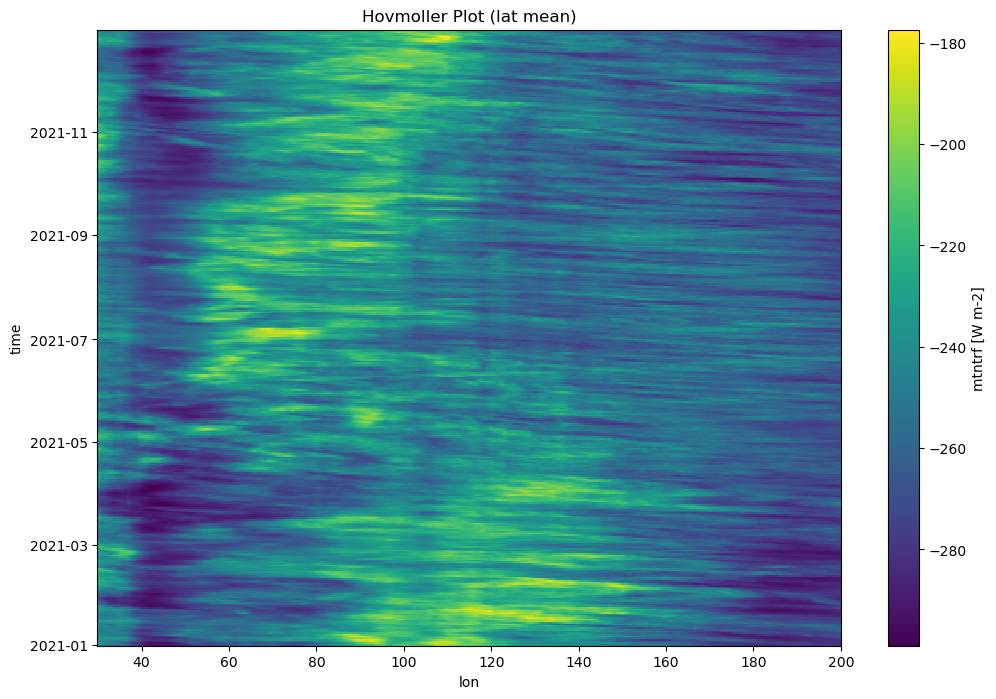

In [10]:
hovmoller_plot(infile,dim='lat',invert_axis=True,contour=False,levels=13)